In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/UniversalBank.csv')
df.head()

,ID,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,0,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,0,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,0,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,0,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [ ]:
## Remap education
df.Education = df.Education.map({1: "Undergraduate", 2: "Graduate", 3: "Advanced/Professional"})

In [ ]:
## Drop
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [ ]:
## dummy encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,Personal Loan,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergraduate
0,0,25,1,49,4,1.6,0,1,0,0,0,0,1
1,0,45,19,34,3,1.5,0,1,0,0,0,0,1
2,0,39,15,11,1,1.0,0,0,0,0,0,0,1
3,0,35,9,100,1,2.7,0,0,0,0,0,1,0
4,0,35,8,45,4,1.0,0,0,0,0,1,1,0


## TRAIN/TEST

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Personal Loan', axis = 1), df['Personal Loan'], test_size = 0.3, random_state = 591)

## MODELS

In [ ]:
import statsmodels.api as sm

lr = sm.Logit(y_train, sm.add_constant(X_train[['Income', 'Family', 'Education_Graduate', 'Education_Undergraduate']])).fit()

Optimization terminated successfully.
         Current function value: 0.129806
         Iterations 9


In [ ]:
print(lr.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3495
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                  0.5774
Time:                        21:50:38   Log-Likelihood:                -454.32
converged:                       True   LL-Null:                       -1075.0
Covariance Type:            nonrobust   LLR p-value:                1.732e-267
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -9.4638      0.492    -19.246      0.000     -10.428      -8.500
Income                      0.0646      0.003     20.133      0.000       0.058       0.071


In [ ]:
## log odds
## the log odds of accepting the offer is -2.52
yhat = -9.4638 + 0.0646*80 + 0.5888*3
yhat

-2.5294000000000008

In [ ]:
##  odds
exp(yhat)

0.0797068300395613

In [ ]:
## LOGIT transform to calculate the prob
from numpy import exp
exp(yhat) / (1+exp(yhat))

0.0738226598387275

In [ ]:
## ODDS
0.0738226598387275 / (1- 0.0738226598387275)

0.0797068300395613

## **Predictive Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'newton-cg')

lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [ ]:
## How do we get parameter estimates

## SLOPES
pd.DataFrame(lr.coef_, columns = X_train.columns)

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Undergraduate
0,-0.05124,0.059194,0.059088,0.60491,0.115868,0.001437,-0.351436,2.942674,-0.781216,-0.864995,0.18687,-3.638089


In [ ]:
## INTERCEPT
lr.intercept_

array([-7.84621961])

In [ ]:
## Income
## As income increases by $1, then the log odds of accepting the offer increase by 0.059088
## As income increases by $1, then the odds of accepting the offer change by a factor of 1.0608685930687864
exp(0.059088)

1.0608685930687864

In [ ]:
## Age in years
## As age increases by 1 year, the log odds of accepting the offer decrease by 0.05124
## As age increases by 1 year, the odds of accepting the offer change  by a factor 0.9500506310173356
## As age increases by 1 year, the odds of accepting the offer decrease 5%
exp(-0.05124)

0.9500506310173356

In [ ]:
exp(0)

1.0

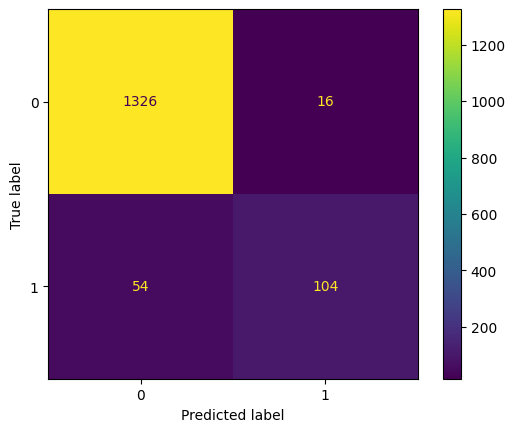

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay(confusion_matrix(y_test, lr.predict(X_test))).plot()

In [ ]:
## What is the recall (sensitivity, detection rate) of this model?
104 / (104+54)

0.6582278481012658

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 1)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

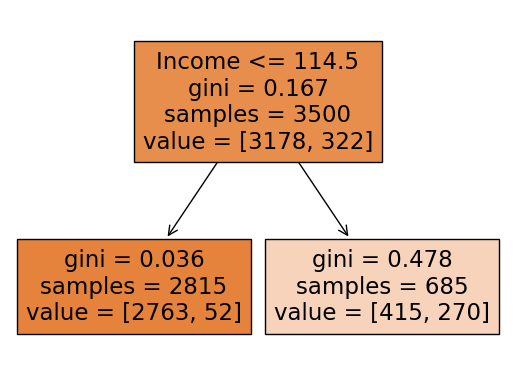

In [ ]:
## plot tree
from sklearn.tree import plot_tree

plot_tree(dt, filled = True, feature_names=X_train.columns, impurity = True);

In [ ]:
## GINI
2*(3178/3500)*(322/3500)

0.167072

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 3, max_depth = 1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=3)

In [ ]:
## EACH TREE
rf.estimators_[2]

DecisionTreeClassifier(max_depth=1, max_features='sqrt',
                       random_state=1953578087)

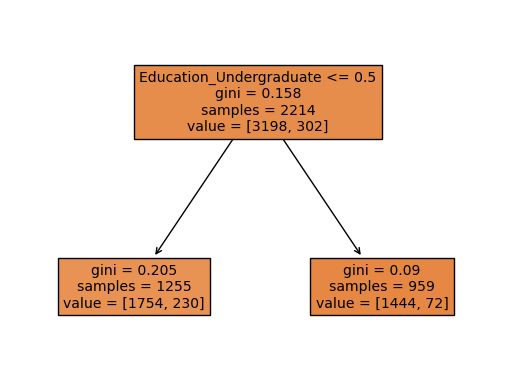

In [ ]:
plot_tree(rf.estimators_[0], filled = True, feature_names=X_train.columns, impurity = True);

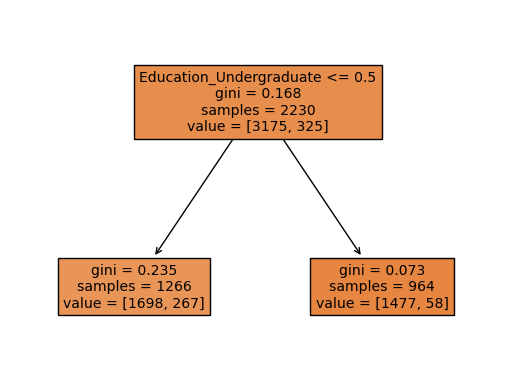

In [ ]:
plot_tree(rf.estimators_[1], filled = True, feature_names=X_train.columns, impurity = True);

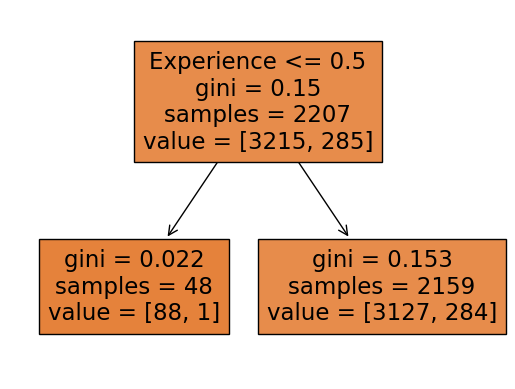

In [ ]:
plot_tree(rf.estimators_[2], filled = True, feature_names=X_train.columns, impurity = True);